In [1]:
from ipynb.fs.full.converter import main_df
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates


In [2]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<h1> Distribution: Histogram </h1>
<p> Let's go ahead and take a look at distributions of different numerical and categorical values. </p>

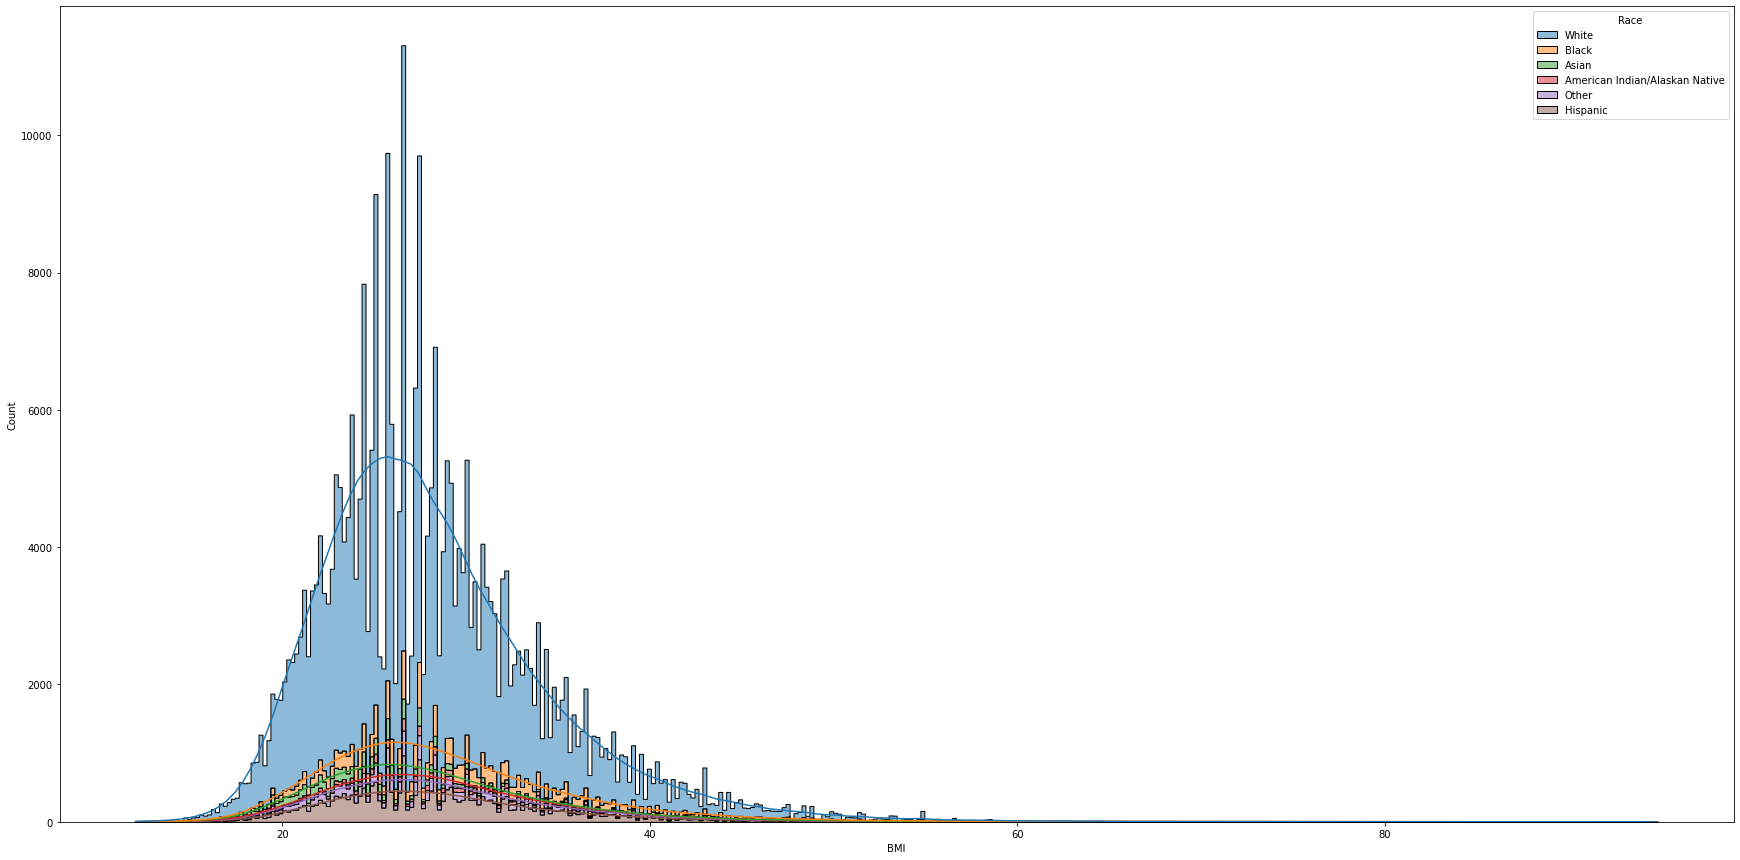

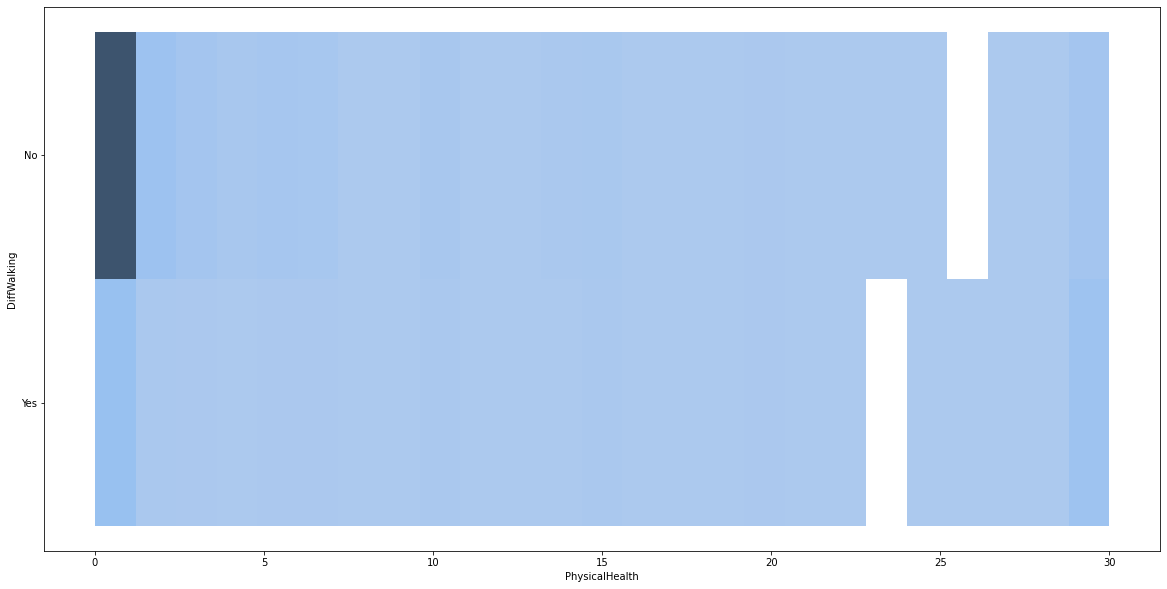

In [3]:
plt.figure(figsize=(30, 15))
sns.histplot(data=main_df, x="BMI", kde=True, hue="Race", multiple="stack", element="step", common_norm=True)
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(data=main_df, x="PhysicalHealth", y="DiffWalking", bins=25, common_norm=True, pthresh=0.0001, stat="density")
plt.show()

<h1> Ranking: Bar Chart </h1>
<p> What do we want to rank by? We can rank by any numerical value, so that gives us BMI, Physical or Mental Health, and Sleep Time.</p>
<p> Let's start with BMI. This will be our Y axis (height). </p>
<p> What should our different sets of bars be? Let's try the response to each disease first. </p>
<p> Sets: Diseases (Heart Disease, Kidney Disease, Diabetic, Skin Cancer) </p>
<p> Bars: Values for diseases (Yes, No) </p>
<p> So we'll want a dataframe that contains BMI and diseases. </p>

<AxesSubplot:>

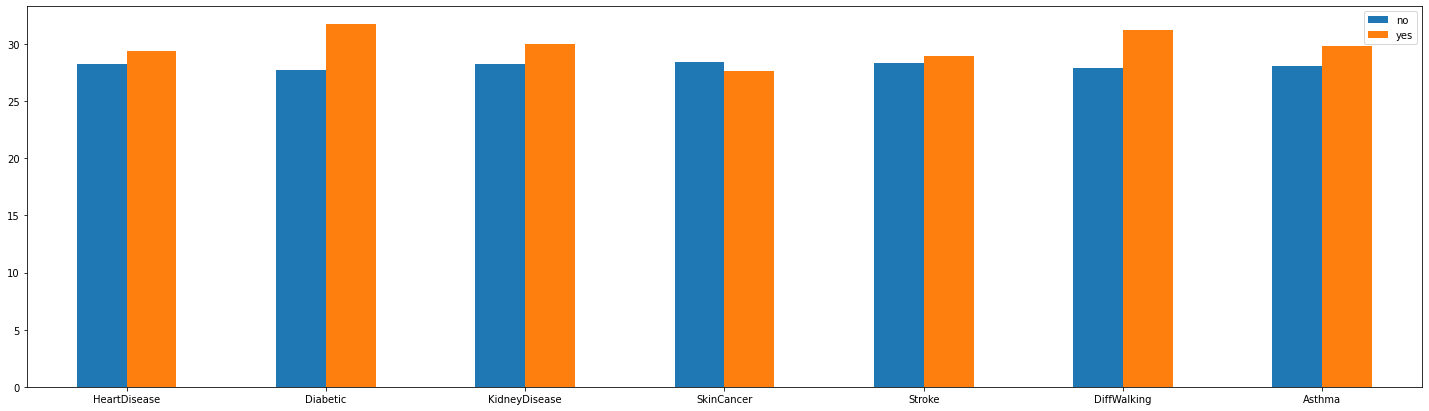

In [4]:
columns = ["BMI", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).BMI.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).BMI.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).BMI.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).BMI.mean()
stroke = main_df[columns].groupby(["Stroke"]).BMI.mean()
walking = main_df[columns].groupby(["DiffWalking"]).BMI.mean()
asthma = main_df[columns].groupby(["Asthma"]).BMI.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no':no_bars,
                    'yes':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)


<p>Let's examine BMI over polar non-disease categories. </p>

<AxesSubplot:>

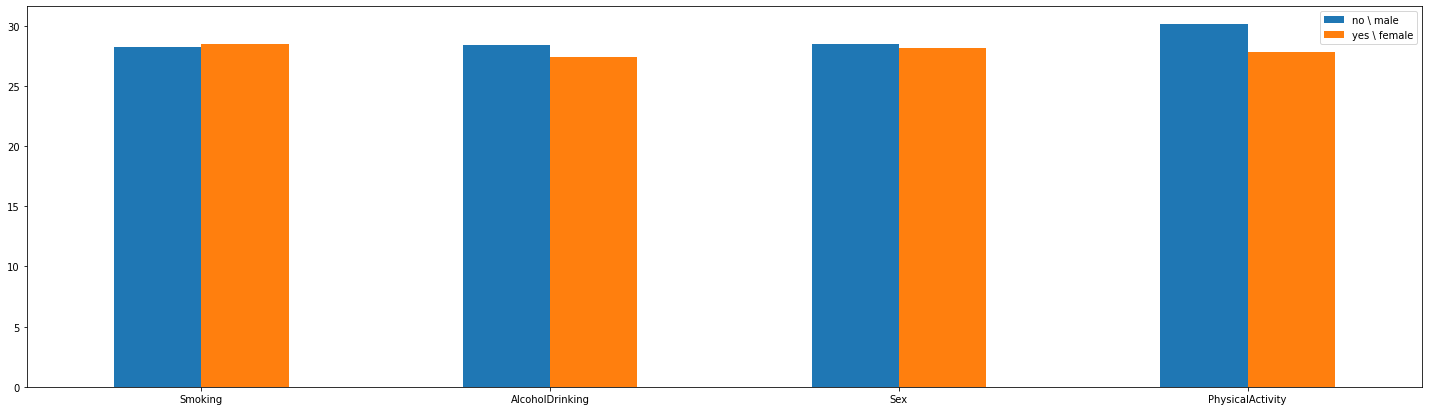

In [5]:
columns = ["BMI", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).BMI.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).BMI.mean()
sex = main_df[columns].groupby(["Sex"]).BMI.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).BMI.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)

<p> Let's go ahead and look at the rest of the variables and compare them to BMI. </p>

<AxesSubplot:xlabel='AgeCategory'>

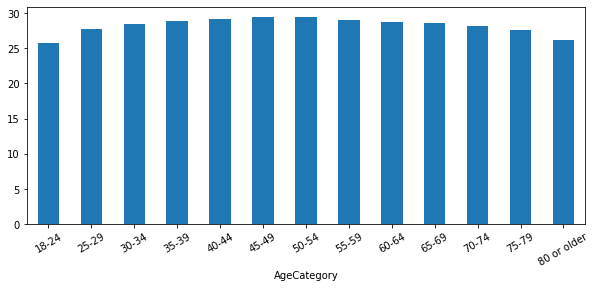

In [6]:
columns = ["BMI", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).BMI.mean()
age.plot.bar(figsize=(10, 4), rot=30)

<AxesSubplot:xlabel='Race'>

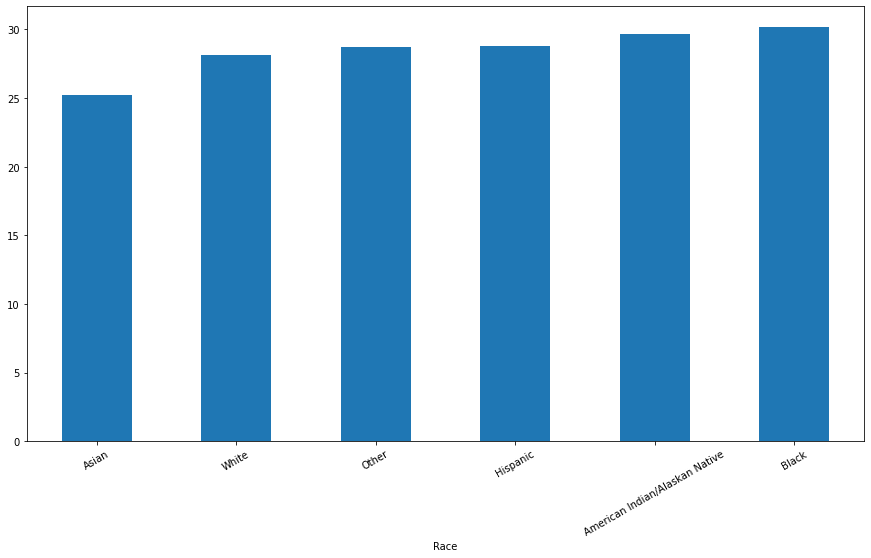

In [7]:
columns = ["BMI", "Race"]
age = main_df[columns].groupby(["Race"]).BMI.mean().sort_values()
age.plot.bar(rot=30, figsize=(15, 8))

<AxesSubplot:xlabel='GenHealth'>

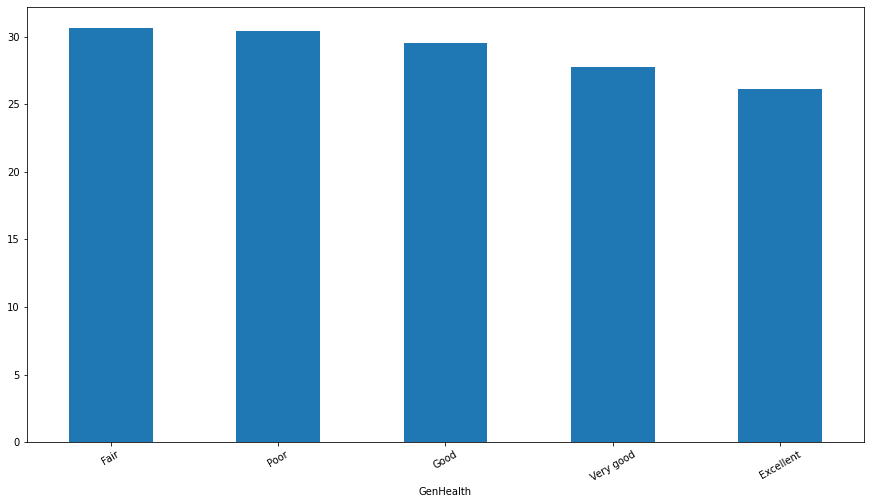

In [8]:
columns = ["BMI", "GenHealth"]
age = main_df[columns].groupby(["GenHealth"]).BMI.mean().sort_values(ascending=False)
age.plot.bar(rot=30, figsize=(15, 8))

<h3> Great! Here were the top insights we got from ranking BMI against other features: </h3>
<p> - Diabetics and those who had difficulty walking tended to have higher on average BMI. </p>
<p> - Those who drank alcohol, those who exercised, and those who were on the more positive end of their general health response had a lower average BMI. </p>
<p> - Age extremes tend to have a lower BMI, which makes sense.

<h3> Now we'll do the same for the other 3 numerical values! </h3>

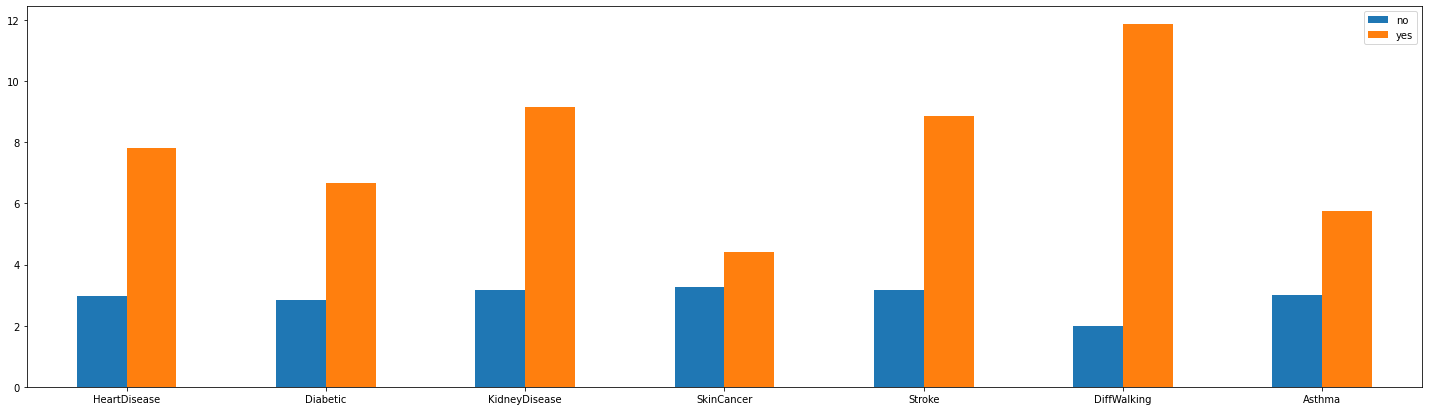

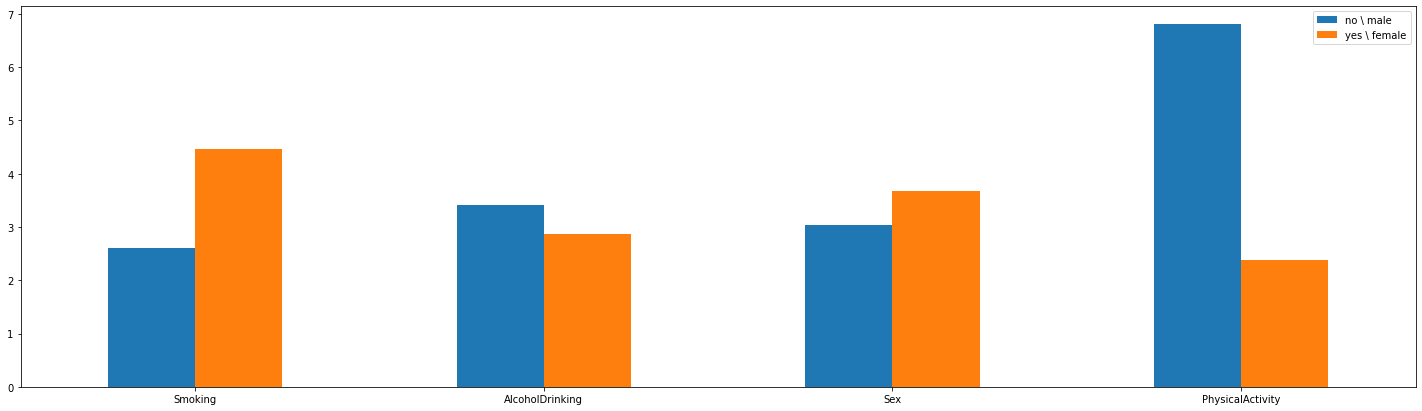

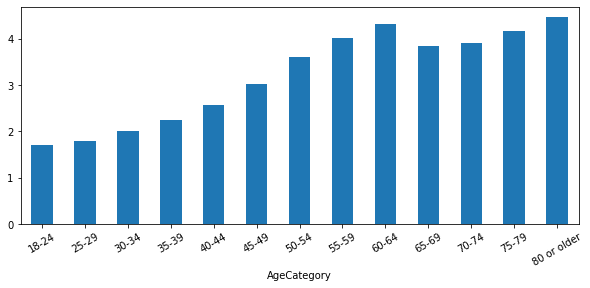

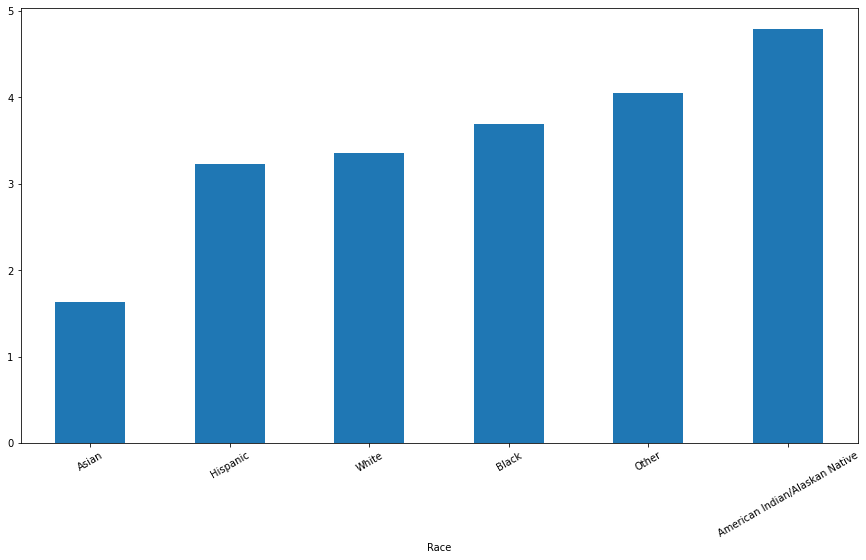

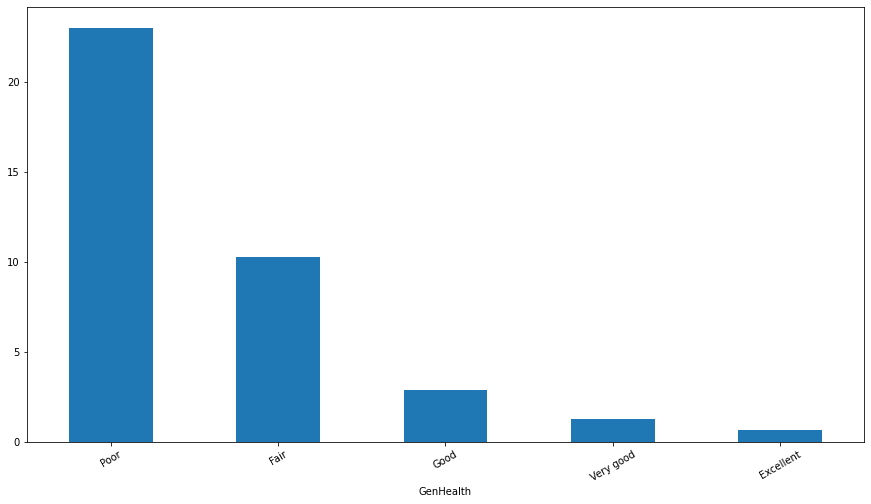

In [9]:
columns = ["PhysicalHealth", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).PhysicalHealth.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).PhysicalHealth.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).PhysicalHealth.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).PhysicalHealth.mean()
stroke = main_df[columns].groupby(["Stroke"]).PhysicalHealth.mean()
walking = main_df[columns].groupby(["DiffWalking"]).PhysicalHealth.mean()
asthma = main_df[columns].groupby(["Asthma"]).PhysicalHealth.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no':no_bars,
                    'yes':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["PhysicalHealth", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).PhysicalHealth.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).PhysicalHealth.mean()
sex = main_df[columns].groupby(["Sex"]).PhysicalHealth.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).PhysicalHealth.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["PhysicalHealth", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).PhysicalHealth.mean()
age.plot.bar(figsize=(10, 4), rot=30)
plt.show()

columns = ["PhysicalHealth", "Race"]
race = main_df[columns].groupby(["Race"]).PhysicalHealth.mean().sort_values()
race.plot.bar(rot=30, figsize=(15, 8))
plt.show()

columns = ["PhysicalHealth", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).PhysicalHealth.mean().sort_values(ascending=False)
gen_health.plot.bar(rot=30, figsize=(15, 8))
plt.show()

<p> For days in the past month feeling physically unwell: </p>
<p> - Patients who had difficulty walking, had a stroke in the past, or had kidney disease all had higher changes to average physical sick days than patients with heart disease. </p>
<p> - Patients who did not exercise had more physical sick days. </p>
<p> - American natives and those who felt they were in poor general health had the highest average sick days.

<h3> Next: Days in the past month spent feeling mentally unwell </h3>

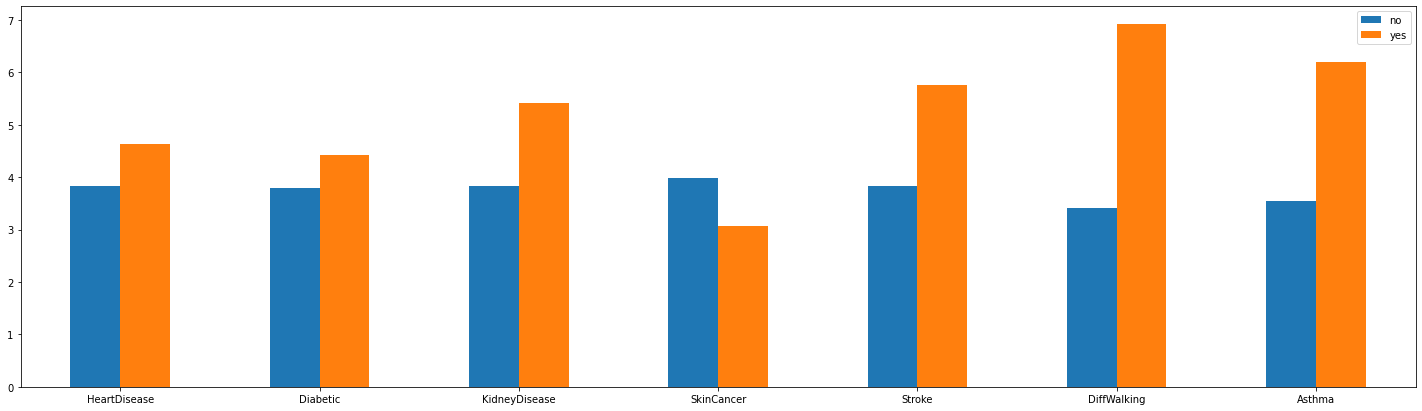

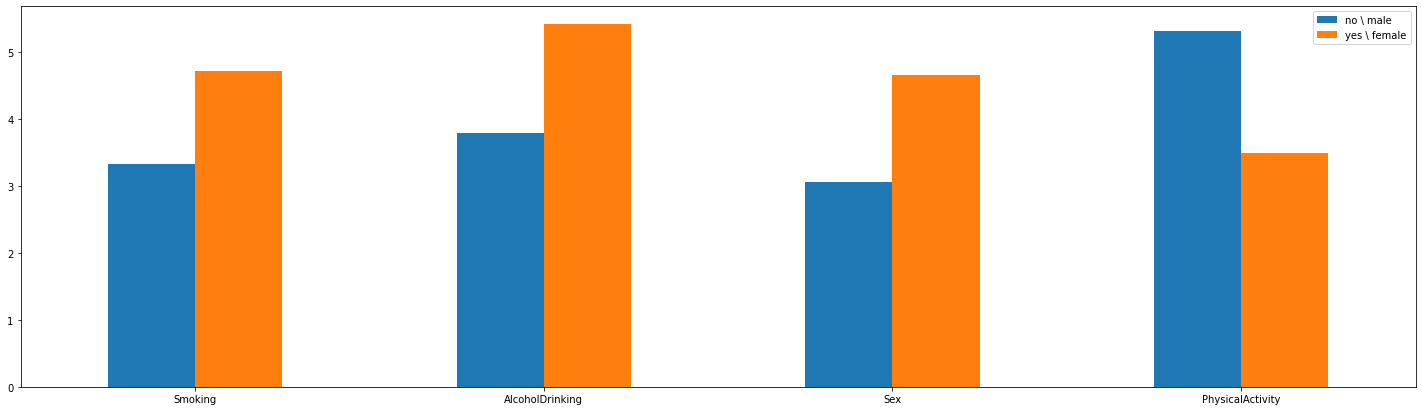

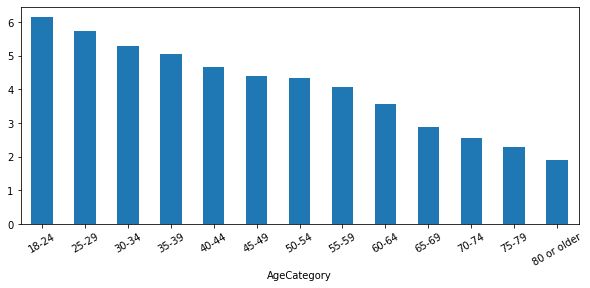

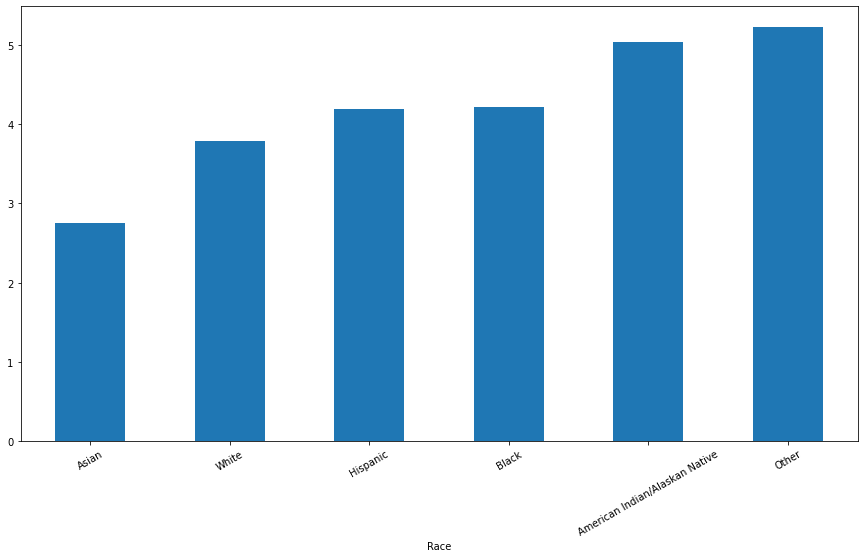

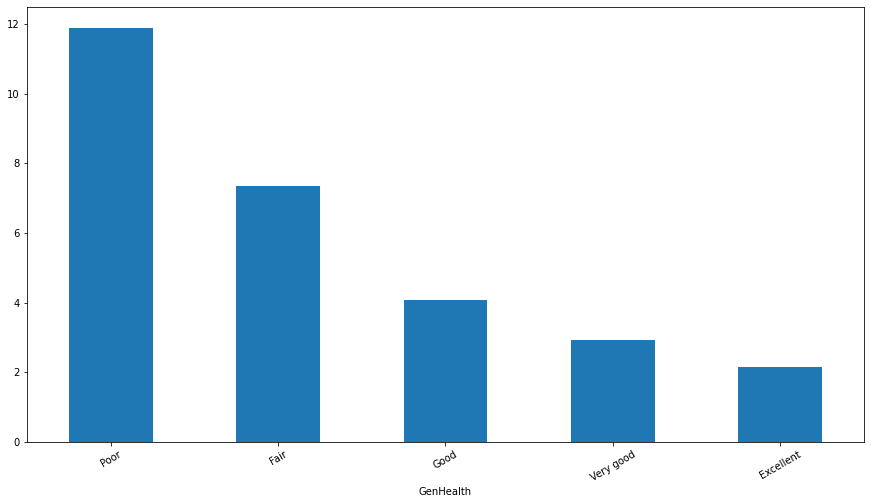

In [10]:
columns = ["MentalHealth", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).MentalHealth.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).MentalHealth.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).MentalHealth.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).MentalHealth.mean()
stroke = main_df[columns].groupby(["Stroke"]).MentalHealth.mean()
walking = main_df[columns].groupby(["DiffWalking"]).MentalHealth.mean()
asthma = main_df[columns].groupby(["Asthma"]).MentalHealth.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no':no_bars,
                    'yes':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["MentalHealth", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).MentalHealth.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).MentalHealth.mean()
sex = main_df[columns].groupby(["Sex"]).MentalHealth.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).MentalHealth.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["MentalHealth", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).MentalHealth.mean()
age.plot.bar(figsize=(10, 4), rot=30)
plt.show()

columns = ["MentalHealth", "Race"]
race = main_df[columns].groupby(["Race"]).MentalHealth.mean().sort_values()
race.plot.bar(rot=30, figsize=(15, 8))
plt.show()

columns = ["MentalHealth", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).MentalHealth.mean().sort_values(ascending=False)
gen_health.plot.bar(rot=30, figsize=(15, 8))
plt.show()

<h3> Mental Wellbeing insights: </h3>
<p> - Patients who have had a stroke, difficulty walking, or asthma all note more days feeling mentally unwell than those with heart disease. </p>
<p> - There's a significant positive correlation between more mental sick days and all of the following: smokers, alcoholics, non-exercisers, and women. </p>
<p> - Age category correlation compared to physical sick days is flipped: More old people feel physically unwell, </p>
<p>     more young people feel mentally unwell. </p>
<p> - Those of asian descent report the fewest physical and mental sick days. Could this be bias?

<h3> Next: Sleep Time in Hours </h3>

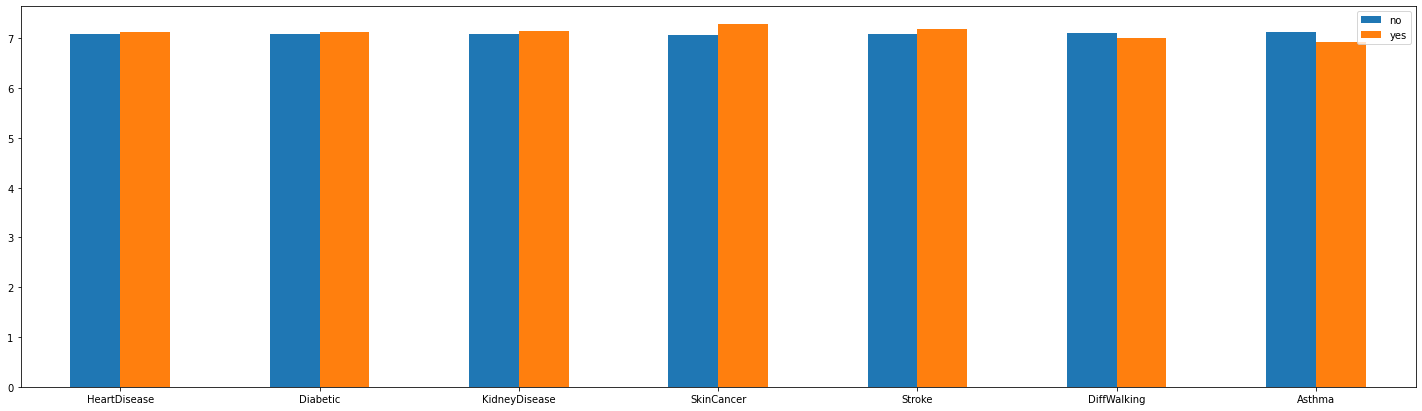

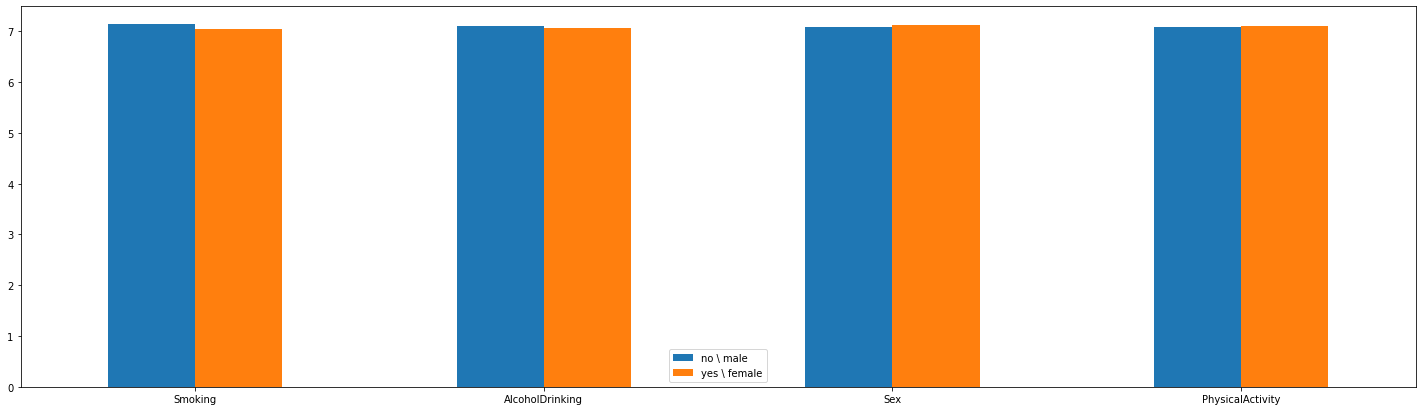

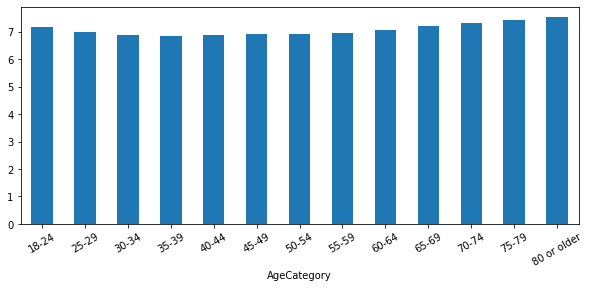

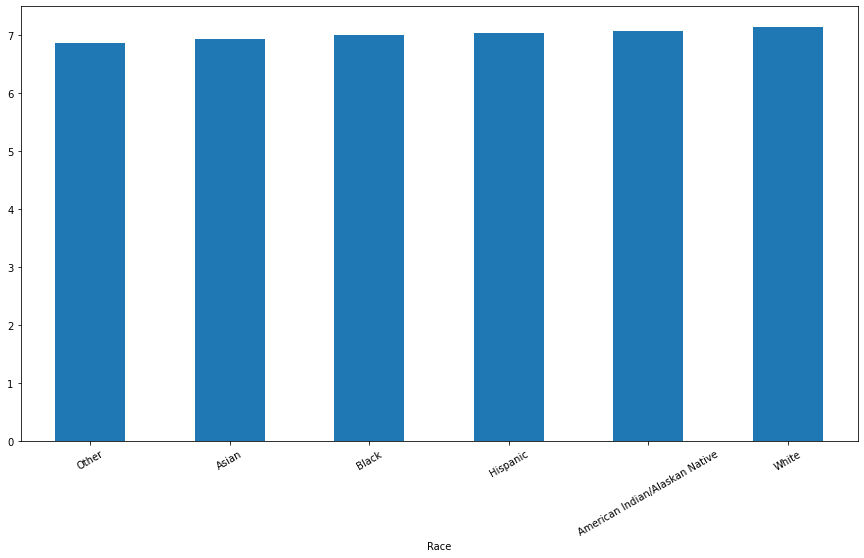

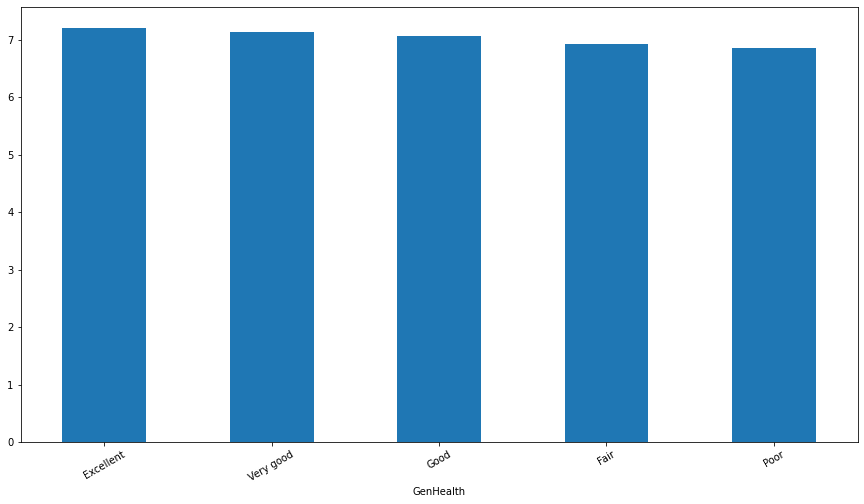

In [11]:
columns = ["SleepTime", "HeartDisease", "Diabetic", "KidneyDisease", "SkinCancer", "Stroke", "DiffWalking", "Asthma"]
heart = main_df[columns].groupby(["HeartDisease"]).SleepTime.mean()
diabetes = main_df[columns].groupby(["Diabetic"]).SleepTime.mean()
kidney = main_df[columns].groupby(["KidneyDisease"]).SleepTime.mean()
cancer = main_df[columns].groupby(["SkinCancer"]).SleepTime.mean()
stroke = main_df[columns].groupby(["Stroke"]).SleepTime.mean()
walking = main_df[columns].groupby(["DiffWalking"]).SleepTime.mean()
asthma = main_df[columns].groupby(["Asthma"]).SleepTime.mean()
no_bars = [heart.No, diabetes.No, kidney.No, cancer.No, stroke.No, walking.No, asthma.No]
yes_bars = [heart.Yes, diabetes.Yes, kidney.Yes, cancer.Yes, stroke.Yes, walking.Yes, asthma.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no':no_bars,
                    'yes':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["SleepTime", "Smoking", "AlcoholDrinking", "Sex", "PhysicalActivity"]
smoke = main_df[columns].groupby(["Smoking"]).SleepTime.mean()
drank = main_df[columns].groupby(["AlcoholDrinking"]).SleepTime.mean()
sex = main_df[columns].groupby(["Sex"]).SleepTime.mean()
pa = main_df[columns].groupby(["PhysicalActivity"]).SleepTime.mean()
no_bars = [smoke.No, drank.No, sex.Male, pa.No]
yes_bars = [smoke.Yes, drank.Yes, sex.Female, pa.Yes]
labels = tuple(columns[1:])
df = pd.DataFrame({'no \ male':no_bars,
                    'yes \ female':yes_bars}, index=labels)
df.plot.bar(figsize=(25, 7), rot=0)
plt.show()

columns = ["SleepTime", "AgeCategory"]
age = main_df[columns].groupby(["AgeCategory"]).SleepTime.mean()
age.plot.bar(figsize=(10, 4), rot=30)
plt.show()

columns = ["SleepTime", "Race"]
race = main_df[columns].groupby(["Race"]).SleepTime.mean().sort_values()
race.plot.bar(rot=30, figsize=(15, 8))
plt.show()

columns = ["SleepTime", "GenHealth"]
gen_health = main_df[columns].groupby(["GenHealth"]).SleepTime.mean().sort_values(ascending=False)
gen_health.plot.bar(rot=30, figsize=(15, 8))
plt.show()

<h5> It doesn't seem like sleep time changes significantly. </h5>

<p> And that's it for ranking! If we want, we can apply other aggregate functions to each group (instead of average) such as max or min, but those aren't as useful. Median and mode may be. </p>